# Project 1

    We begin by loading the data

In [17]:

from preprocessing_functions import *
%matplotlib inline 
import numpy as np   # generic stuff
import matplotlib.pyplot as plt

#### REMOVE THIS LINE BEFORE SUBMISSION
import pandas as pd
#######################################################################

from lib.proj1_helpers import * #the helper provided for the project
from lib.costs import *

# choose which implementations you would like
from lib.implementations import *
#from implementations import * #our implementations of the functions done by us


import datetime
from helpers import * #helpers of exo 2
# Useful starting lines

%load_ext autoreload
%autoreload 2
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
import operator

In [19]:
DATA_FOLDER = '../data/' # get rid of the ..

y_train, tx_train, ids_train = load_csv_data(DATA_FOLDER+'train.csv',sub_sample=False)

y_test, tx_test, ids_test = load_csv_data(DATA_FOLDER+'test.csv',sub_sample=False)
AAA = 0;

note that here we are only considering a sub_sample as the "True" value indicates

In [20]:
print(tx_train.shape)
print(tx_test.shape)
print(y_train.shape)

(250000, 30)
(568238, 30)
(250000,)


In [21]:
# illegal: 
pd.DataFrame(tx_train).head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,197.760,...,-0.277,258.733,2.0,67.435,2.150,0.444,46.062,1.24,-2.475,113.497
1,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,125.157,...,-1.916,164.546,1.0,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226
2,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,197.814,...,-2.186,260.414,1.0,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251
3,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,75.968,...,0.060,86.062,0.0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000
4,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,57.983,...,-0.871,53.131,0.0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000


# Methods

### Functions for methods: 

In [15]:
OUT_FOLDER = 'output/'

def func_least_squares (y, tx, test_set, fct='mse'):
    #name = 'least_squares'
    w,loss = least_squares(y,tx,fct)
    #y_pred = predict_labels(w, test_set)
    #create_csv_submission(ids_test, y_pred, OUT_FOLDER+name)
    
    plt.plot(w, 'go')
    plt.title('least squares weights for loss:  '+str(loss),fontsize=15, fontweight='bold');
    plt.show()
    
    return w, loss

def func_GD (y, tx, test_set, max_iters, gamma, initial_w):
    name = 'Gradient_descent'
    w,loss = least_squares_GD(y, tx, initial_w, max_iters, gamma,fct='mse');
    y_pred = predict_labels(w, test_set)
    create_csv_submission(ids_test, y_pred, OUT_FOLDER+name)
    
    plt.plot(w, 'go')
    plt.title('GD: weights with loss:  '+str(loss),fontsize=15, fontweight='bold');
    plt.show()
    
    return w, loss

########################  RIDGE REGRESSION #######################################################
def func_ridge_regression (y, tx, test_set, lambda_):
    name = 'Ridge_regression'
    
    w,loss = ridge_regression(y, tx, lambda_=lambda_, fct='mse');
    
    y_pred = predict_labels(w, test_set)
    create_csv_submission(ids_test, y_pred, OUT_FOLDER+name)
    
    plt.plot(w, 'go')
    plt.title('Ridge regression: weights ;loss:  '+str(loss),fontsize=15, fontweight='bold');
    plt.show()
    
    return w, loss

## LEAST-SQUARES

In [7]:
#todo: cross_validation su degree

In [22]:
def build_k_indices(y, k_fold, seed):
    """build k indices for k-fold."""
    num_row = y.shape[0]
    interval = int(num_row / k_fold)
    np.random.seed(seed)
    indices = np.random.permutation(num_row)
    k_indices = [indices[k * interval: (k + 1) * interval]
                 for k in range(k_fold)]
    return np.array(k_indices)

def cross_validation_least_square(y, tx, k_fold, degs):            
    seed=1;

    # get k'th subgroup in test, others in train
    k_indices = build_k_indices(y, k_fold, seed)
    accuracy_train = np.zeros([k_fold, len(degs)])
    accuracy_test = np.zeros([k_fold, len(degs)])
               
    for k in range(k_fold):
        print('----- FOLD', k, '-----')
        k_index = k_indices[k]
        test_y = y[k_index]
        test_tx = tx[k_index,:]
        mask = np.ones(len(y), dtype=bool) # set all elements to True
        mask[k_index] = False              # set test elements to False
        train_tx = tx[mask,:]              # select only True elements (ie train elements)
        train_y = y[mask]

        len_init_data = 0

        for i, single_deg in enumerate(degs):
            
            print('++++ Deg =', single_deg)
            if i==0:
                train_tx, test_tx, len_init_data = prepare_data(train_tx, test_tx, single_deg);
            else:
                train_tx = add_powers(train_tx, single_deg, 0, len_init_data, features='x', current_max_deg=single_deg-1)
                test_tx = add_powers(test_tx, single_deg, 0, len_init_data, features='x', current_max_deg=single_deg-1)
            weights,loss = least_squares(train_y,train_tx,fct='mse');

            # Compute the predictions
            y_pred_train = predict_labels(weights, train_tx)
            y_pred_test = predict_labels(weights, test_tx);
            accuracy_train[k, i] = np.sum(y_pred_train == train_y)/len(train_y)
            accuracy_test[k, i] = np.sum(y_pred_test == test_y)/len(test_y)

    accuracies_test=np.mean(accuracy_test, axis=0); # mean on the k's
    accuracies_train=np.mean(accuracy_train, axis=0);

    max_index, acc_max = max(enumerate(accuracies_test), key=operator.itemgetter(1))
    deg_best = degs[max_index]
    
    return deg_best, acc_max;

**** Starting Jet  0 *****
----- FOLD 0 -----
++++ Deg = 2
++++ Deg = 3
++++ Deg = 4
++++ Deg = 5
++++ Deg = 6
++++ Deg = 7
++++ Deg = 8
++++ Deg = 9
++++ Deg = 10
++++ Deg = 11
++++ Deg = 12
++++ Deg = 13
----- FOLD 1 -----
++++ Deg = 2
++++ Deg = 3
++++ Deg = 4
++++ Deg = 5
++++ Deg = 6
++++ Deg = 7
++++ Deg = 8
++++ Deg = 9
++++ Deg = 10
++++ Deg = 11
++++ Deg = 12
++++ Deg = 13
----- FOLD 2 -----
++++ Deg = 2
++++ Deg = 3
++++ Deg = 4
++++ Deg = 5
++++ Deg = 6
++++ Deg = 7
++++ Deg = 8
++++ Deg = 9
++++ Deg = 10
++++ Deg = 11
++++ Deg = 12
++++ Deg = 13
----- FOLD 3 -----
++++ Deg = 2
++++ Deg = 3
++++ Deg = 4
++++ Deg = 5
++++ Deg = 6
++++ Deg = 7
++++ Deg = 8
++++ Deg = 9
++++ Deg = 10
++++ Deg = 11
++++ Deg = 12
++++ Deg = 13
----- FOLD 4 -----
++++ Deg = 2
++++ Deg = 3
++++ Deg = 4
++++ Deg = 5
++++ Deg = 6
++++ Deg = 7
++++ Deg = 8
++++ Deg = 9
++++ Deg = 10
++++ Deg = 11
++++ Deg = 12
++++ Deg = 13
12
12
[ 0.63061756  0.61141027  0.57356621  0.54820338  0.54161746  0.50752677

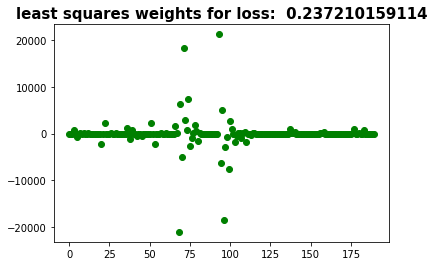

**** Jet  0 ***** Accuracy jet 83.4135698057
**** Starting Jet  1 *****
----- FOLD 0 -----
++++ Deg = 2
++++ Deg = 3
++++ Deg = 4
++++ Deg = 5
++++ Deg = 6
++++ Deg = 7
++++ Deg = 8
++++ Deg = 9
++++ Deg = 10
++++ Deg = 11
++++ Deg = 12
++++ Deg = 13
----- FOLD 1 -----
++++ Deg = 2
++++ Deg = 3
++++ Deg = 4
++++ Deg = 5
++++ Deg = 6
++++ Deg = 7
++++ Deg = 8
++++ Deg = 9
++++ Deg = 10
++++ Deg = 11
++++ Deg = 12
++++ Deg = 13
----- FOLD 2 -----
++++ Deg = 2
++++ Deg = 3
++++ Deg = 4
++++ Deg = 5
++++ Deg = 6
++++ Deg = 7
++++ Deg = 8
++++ Deg = 9
++++ Deg = 10
++++ Deg = 11
++++ Deg = 12
++++ Deg = 13
----- FOLD 3 -----
++++ Deg = 2
++++ Deg = 3
++++ Deg = 4
++++ Deg = 5
++++ Deg = 6
++++ Deg = 7
++++ Deg = 8
++++ Deg = 9
++++ Deg = 10
++++ Deg = 11
++++ Deg = 12
++++ Deg = 13
----- FOLD 4 -----
++++ Deg = 2
++++ Deg = 3
++++ Deg = 4
++++ Deg = 5
++++ Deg = 6
++++ Deg = 7
++++ Deg = 8
++++ Deg = 9
++++ Deg = 10
++++ Deg = 11
++++ Deg = 12
++++ Deg = 13
12
12
[ 0.54350013  0.54740779  0

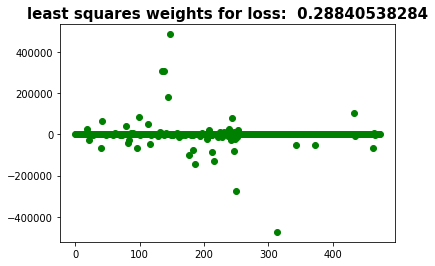

**** Jet  1 ***** Accuracy jet 80.7992881461
**** Starting Jet  2 *****
----- FOLD 0 -----
++++ Deg = 2
++++ Deg = 3
++++ Deg = 4
++++ Deg = 5
++++ Deg = 6
++++ Deg = 7
++++ Deg = 8
++++ Deg = 9
++++ Deg = 10
++++ Deg = 11
++++ Deg = 12
++++ Deg = 13
----- FOLD 1 -----
++++ Deg = 2
++++ Deg = 3
++++ Deg = 4
++++ Deg = 5
++++ Deg = 6
++++ Deg = 7
++++ Deg = 8
++++ Deg = 9
++++ Deg = 10
++++ Deg = 11
++++ Deg = 12
++++ Deg = 13
----- FOLD 2 -----
++++ Deg = 2
++++ Deg = 3
++++ Deg = 4
++++ Deg = 5
++++ Deg = 6
++++ Deg = 7
++++ Deg = 8
++++ Deg = 9
++++ Deg = 10
++++ Deg = 11
++++ Deg = 12
++++ Deg = 13
----- FOLD 3 -----
++++ Deg = 2
++++ Deg = 3
++++ Deg = 4
++++ Deg = 5
++++ Deg = 6
++++ Deg = 7
++++ Deg = 8
++++ Deg = 9
++++ Deg = 10
++++ Deg = 11
++++ Deg = 12
++++ Deg = 13
----- FOLD 4 -----
++++ Deg = 2
++++ Deg = 3
++++ Deg = 4
++++ Deg = 5
++++ Deg = 6
++++ Deg = 7
++++ Deg = 8
++++ Deg = 9
++++ Deg = 10
++++ Deg = 11
++++ Deg = 12
++++ Deg = 13
12
12
[ 0.52015881  0.51406452  0

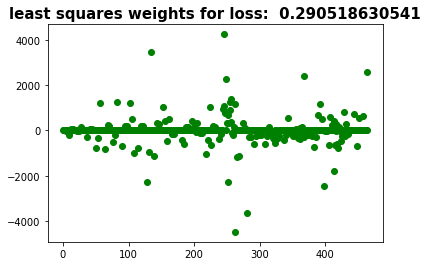

**** Jet  2 ***** Accuracy jet 80.5831794994
**** Starting Jet  3 *****
----- FOLD 0 -----
++++ Deg = 2
++++ Deg = 3
++++ Deg = 4
++++ Deg = 5
++++ Deg = 6
++++ Deg = 7
++++ Deg = 8
++++ Deg = 9
++++ Deg = 10
++++ Deg = 11
++++ Deg = 12
++++ Deg = 13
----- FOLD 1 -----
++++ Deg = 2
++++ Deg = 3
++++ Deg = 4
++++ Deg = 5
++++ Deg = 6
++++ Deg = 7
++++ Deg = 8
++++ Deg = 9
++++ Deg = 10
++++ Deg = 11
++++ Deg = 12
++++ Deg = 13
----- FOLD 2 -----
++++ Deg = 2
++++ Deg = 3
++++ Deg = 4
++++ Deg = 5
++++ Deg = 6
++++ Deg = 7
++++ Deg = 8
++++ Deg = 9
++++ Deg = 10
++++ Deg = 11
++++ Deg = 12
++++ Deg = 13
----- FOLD 3 -----
++++ Deg = 2
++++ Deg = 3
++++ Deg = 4
++++ Deg = 5
++++ Deg = 6
++++ Deg = 7
++++ Deg = 8
++++ Deg = 9
++++ Deg = 10
++++ Deg = 11
++++ Deg = 12
++++ Deg = 13
----- FOLD 4 -----
++++ Deg = 2
++++ Deg = 3
++++ Deg = 4
++++ Deg = 5
++++ Deg = 6
++++ Deg = 7
++++ Deg = 8
++++ Deg = 9
++++ Deg = 10
++++ Deg = 11
++++ Deg = 12
++++ Deg = 13
12
12
[ 0.51326715  0.50672383  0

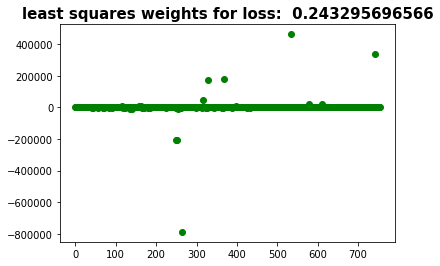

**** Jet  3 ***** Accuracy jet 84.8853997473
>>>>>>>> Accuracy TOTAL  82.1628


In [23]:
OUT_FOLDER = 'output/'
name = 'least_squares.csv'

degs=range(2,14)
k_fold=5

mask_jets_train = split_jets_mask(tx_train)
mask_jets_test = split_jets_mask(tx_test)
len_mask = len(mask_jets_train)
y_preds_train = np.zeros(len(y_train))
y_preds_test = np.zeros(tx_test.shape[0])


for mask_jet_id in range(len_mask):
    print('**** Starting Jet ', mask_jet_id, '*****')
    tx_single_jet_train = tx_train[mask_jets_train[mask_jet_id]]
    tx_single_jet_test = tx_test[mask_jets_test[mask_jet_id]]
    y_single_jet_train = y_train[mask_jets_train[mask_jet_id]]
    
    best_deg, best_acc = cross_validation_least_square(y_single_jet_train, tx_single_jet_train, k_fold, degs)
    print('Best degree = ', best_deg)
    
    tx_single_jet_train, tx_single_jet_test,len_init_data = prepare_data(tx_single_jet_train,tx_single_jet_test, best_deg)
    w, loss = func_least_squares(y=y_single_jet_train, tx=tx_single_jet_train, test_set=tx_single_jet_test, fct='mse')
    
    y_pred_train = predict_labels(w, tx_single_jet_train)
    y_pred_test = predict_labels(w, tx_single_jet_test)
    y_preds_train[mask_jets_train[mask_jet_id]] = y_pred_train
    y_preds_test[mask_jets_test[mask_jet_id]] = y_pred_test
    
    right_train = np.sum(y_single_jet_train == y_pred_train)/len(y_single_jet_train)*100
    
    print('**** Jet ', mask_jet_id, '***** Accuracy jet', right_train)
    

create_csv_submission(ids_test, y_preds_test, OUT_FOLDER+name)
right_train_total = np.sum(y_train == y_preds_train)/len(y_train)*100
print('>>>>>>>> Accuracy TOTAL ',right_train_total)

In [1]:
len(y_preds_test[y_preds_test==-1])

NameError: name 'y_preds_test' is not defined

In [25]:
len(y_preds_test[y_preds_test==1])

246651

In [15]:
len(y_preds_test[y_preds_test==-1])+len(y_preds_test[y_preds_test==1])==tx_test.shape[0]

True

In [26]:
y_preds_test[:200]

array([ 1., -1.,  1.,  1., -1.,  1.,  1., -1., -1., -1., -1.,  1.,  1.,
       -1., -1.,  1., -1.,  1., -1., -1., -1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1., -1., -1., -1., -1., -1., -1., -1.,  1.,  1.,
       -1., -1., -1.,  1.,  1.,  1.,  1., -1.,  1., -1.,  1.,  1., -1.,
        1., -1., -1., -1.,  1., -1.,  1., -1., -1., -1.,  1., -1., -1.,
       -1.,  1.,  1.,  1., -1.,  1., -1.,  1.,  1.,  1., -1.,  1.,  1.,
        1.,  1., -1., -1., -1.,  1., -1., -1., -1.,  1., -1.,  1.,  1.,
       -1., -1., -1., -1., -1., -1.,  1., -1.,  1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1.,  1., -1.,  1., -1., -1.,  1., -1., -1.,
       -1.,  1., -1., -1.,  1., -1., -1., -1.,  1., -1., -1., -1., -1.,
       -1., -1.,  1.,  1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1.,  1.,  1., -1., -1., -1.,  1.,  1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1.,  1., -1.,  1.,  1.,  1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1.,  1.,  1., -1.,  1., -1., -1

## Gradient descent 

In [ ]:
#cross validation su gamma e degree 

In [ ]:


def build_k_indices(y, k_fold, seed):
    """build k indices for k-fold."""
    num_row = y.shape[0]
    interval = int(num_row / k_fold)
    np.random.seed(seed)
    indices = np.random.permutation(num_row)
    k_indices = [indices[k * interval: (k + 1) * interval]
                 for k in range(k_fold)]
    return np.array(k_indices)





def cross_validation_GD(y,tx, k_fold, max_iters, gammas):
    
    accuracies_test=np.zeros(len(gammas))
    accuracies_train=np.zeros(len(gammas))
    acc_max=0;
    gamma_best=0;
    
    for i, single_gamma in enumerate(gammas):
        
        seed=1;

        # get k'th subgroup in test, others in train
        k_indices = build_k_indices(y, k_fold, seed)
        accuracy_train = np.zeros(k_fold)
        accuracy_test = np.zeros(k_fold)


        for k in range(k_fold):
            #print('----- FOLD', k, '-----')
            k_index = k_indices[k]
            test_y = y[k_index]
            test_tx = tx[k_index,:]
            mask = np.ones(len(y), dtype=bool) # set all elements to True
            mask[k_index] = False              # set test elements to False
            train_tx = tx[mask,:]              # select only True elements (ie train elements)
            train_y = y[mask]
            initial_w = np.zeros(train_tx.shape[1]);
            weights,loss = logistic_regression(train_y, train_tx, initial_w, max_iters, single_gamma)
            # Compute the predictions
            y_pred_train = predict_labels(weights, train_tx)
            y_pred_test = predict_labels(weights, test_tx);
            accuracy_train[k] = np.sum(y_pred_train == train_y)/len(train_y)
            accuracy_test[k] = np.sum(y_pred_test == test_y)/len(test_y)
            
        accuracies_test[i]=np.mean(accuracy_test);
        accuracies_train[i]=np.mean(accuracy_train);
        
        print('GAMMA:', single_gamma, '---','ACCURANCY TEST:',accuracies_test[i], '---','ACCURANCY TRAIN:',accuracies_train[i])
        if (accuracies_test[i]>acc_max):
                gamma_best=gammas[i];
                acc_max=accuracies_test[i];
    
    return [gamma_best,acc_max]

**** Starting Jet  0 *****
Gradient Descent(0/499): loss=0.49999999999999784, w0=4.318881558209673e-06, w1=-0.00360114905465818
Gradient Descent(1/499): loss=0.47984092459190764, w0=5.3194282256529834e-05, w1=-0.006710262173664215
Gradient Descent(2/499): loss=0.4645713617677788, w0=0.00011887164466863113, w1=-0.009420834375421301
Gradient Descent(3/499): loss=0.452604307467966, w0=0.00018513724341014546, w1=-0.011805594078871936
Gradient Descent(4/499): loss=0.44292196291615404, w0=0.000242991769469354, w1=-0.013921787263083287
Gradient Descent(5/499): loss=0.4348546694989052, w0=0.00028790284728711046, w1=-0.01581494114974068
Gradient Descent(6/499): loss=0.4279533363483794, w0=0.0003180631955061308, w1=-0.0175215886442407
Gradient Descent(7/499): loss=0.42191219070426056, w0=0.00033328939320437337, w1=-0.019071272564084807
Gradient Descent(8/499): loss=0.41652026564905853, w0=0.00033432870998928264, w1=-0.020488043214210185
Gradient Descent(9/499): loss=0.41163013287140016, w0=0.000

Gradient Descent(80/499): loss=0.2962611501395158, w0=-0.001028669226970411, w1=-0.054349172748945754
Gradient Descent(81/499): loss=0.29561924839245224, w0=-0.001003848869822909, w1=-0.054580369115421
Gradient Descent(82/499): loss=0.2949887713268207, w0=-0.000978569065921109, w1=-0.05480939916360275
Gradient Descent(83/499): loss=0.29436947960290394, w0=-0.0009528519942034092, w1=-0.0550363198974965
Gradient Descent(84/499): loss=0.29376114027033845, w0=-0.000926718990201887, w1=-0.05526118628038136
Gradient Descent(85/499): loss=0.2931635265096622, w0=-0.0009001905748544322, w1=-0.05548405131419941
Gradient Descent(86/499): loss=0.2925764173893466, w0=-0.0008732864826214343, w1=-0.05570496611564868
Gradient Descent(87/499): loss=0.29199959763718736, w0=-0.0008460256888883737, w1=-0.05592397998913814
Gradient Descent(88/499): loss=0.2914328574250079, w0=-0.0008184264366415564, w1=-0.05614114049675281
Gradient Descent(89/499): loss=0.29087599216571736, w0=-0.0007905062624092724, w1=-0

Gradient Descent(161/499): loss=0.26766063830435716, w0=0.001454336221563384, w1=-0.06884597744001768
Gradient Descent(162/499): loss=0.26748632358134644, w0=0.0014846248246099777, w1=-0.06899139772864381
Gradient Descent(163/499): loss=0.26731446280775817, w0=0.0015148410194038757, w1=-0.06913626687039127
Gradient Descent(164/499): loss=0.2671450127583464, w0=0.0015449842322674445, w1=-0.06928058999832049
Gradient Descent(165/499): loss=0.26697793103010325, w0=0.0015750539232853632, w1=-0.06942437213975439
Gradient Descent(166/499): loss=0.26681317602597954, w0=0.0016050495849057663, w1=-0.06956761821959362
Gradient Descent(167/499): loss=0.26665070693894444, w0=0.0016349707405973188, w1=-0.06971033306351018
Gradient Descent(168/499): loss=0.2664904837363764, w0=0.0016648169435600298, w1=-0.0698525214010242
Gradient Descent(169/499): loss=0.26633246714477676, w0=0.0016945877754877088, w1=-0.06999418786846837
Gradient Descent(170/499): loss=0.2661766186347989, w0=0.0017242828453800402,

Gradient Descent(243/499): loss=0.2587772148918869, w0=0.0036811463351861936, w1=-0.07927051966961458
Gradient Descent(244/499): loss=0.258712044264403, w0=0.0037051288906168552, w1=-0.07938204618128243
Gradient Descent(245/499): loss=0.2586475065334996, w0=0.003729038920906813, w1=-0.07949325571004723
Gradient Descent(246/499): loss=0.25858359226644057, w0=0.003752876612971831, w1=-0.07960414989750372
Gradient Descent(247/499): loss=0.25852029219687933, w0=0.0037766421542610533, w1=-0.07971473036988251
Gradient Descent(248/499): loss=0.2584575972217208, w0=0.003800335732714591, w1=-0.07982499873828697
Gradient Descent(249/499): loss=0.25839549839804254, w0=0.003823957536722971, w1=-0.0799349565989243
Gradient Descent(250/499): loss=0.25833398694007503, w0=0.0038475077550883716, w1=-0.08004460553333101
Gradient Descent(251/499): loss=0.25827305421624375, w0=0.0038709865769875683, w1=-0.080153947108593
Gradient Descent(252/499): loss=0.2582126917462645, w0=0.0038943941919365116, w1=-0.0

Gradient Descent(325/499): loss=0.2549225967634836, w0=0.005423626923952479, w1=-0.08748646775426205
Gradient Descent(326/499): loss=0.2548885617768401, w0=0.005442288238924178, w1=-0.08757639600163215
Gradient Descent(327/499): loss=0.25485474148982584, w0=0.005460892252208809, w1=-0.08766610516126591
Gradient Descent(328/499): loss=0.2548211335020727, w0=0.005479439137487681, w1=-0.08775559609434369
Gradient Descent(329/499): loss=0.2547877354497633, w0=0.0054979290680566015, w1=-0.08784486965620485
Gradient Descent(330/499): loss=0.2547545450049863, w0=0.005516362216825031, w1=-0.087933926696403
Gradient Descent(331/499): loss=0.2547215598751056, w0=0.005534738756315286, w1=-0.08802276805876062
Gradient Descent(332/499): loss=0.2546887778021403, w0=0.005553058858661779, w1=-0.0881113945814229
Gradient Descent(333/499): loss=0.2546561965621562, w0=0.005571322695610295, w1=-0.08819980709691094
Gradient Descent(334/499): loss=0.2546238139646697, w0=0.005589530438517309, w1=-0.088288006

Gradient Descent(407/499): loss=0.2526820170173852, w0=0.006778249709898235, w1=-0.09420034542208705
Gradient Descent(408/499): loss=0.2526599893533654, w0=0.006792754195334078, w1=-0.09427473222941393
Gradient Descent(409/499): loss=0.25263806001201927, w0=0.006807214309159999, w1=-0.09434895509936554
Gradient Descent(410/499): loss=0.25261622821295693, w0=0.006821630192603304, w1=-0.09442301455160947
Gradient Descent(411/499): loss=0.25259449318505656, w0=0.0068360019864988734, w1=-0.09449691110292557
Gradient Descent(412/499): loss=0.25257285416632125, w0=0.0068503298312894674, w1=-0.09457064526722869
Gradient Descent(413/499): loss=0.25255131040373896, w0=0.00686461386702604, w1=-0.09464421755559098
Gradient Descent(414/499): loss=0.2525298611531459, w0=0.006878854233368062, w1=-0.09471762847626418
Gradient Descent(415/499): loss=0.25250850567909056, w0=0.006893051069583849, w1=-0.09479087853470158
Gradient Descent(416/499): loss=0.25248724325470145, w0=0.006907204514550893, w1=-0.

Gradient Descent(489/499): loss=0.25114621559247796, w0=0.00783209074126835, w1=-0.09979714862918636
Gradient Descent(490/499): loss=0.2511302850728192, w0=0.007843391727773737, w1=-0.09985959708197077
Gradient Descent(491/499): loss=0.25111441040482596, w0=0.007854658658189434, w1=-0.09992191630285115
Gradient Descent(492/499): loss=0.25109859125423295, w0=0.007865891643123162, w1=-0.09998410663423936
Gradient Descent(493/499): loss=0.2510828272897213, w0=0.007877090792834707, w1=-0.10004616841696783
Gradient Descent(494/499): loss=0.25106711818288335, w0=0.007888256217236652, w1=-0.1001081019903003
Gradient Descent(495/499): loss=0.2510514636081866, w0=0.007899388025895116, w1=-0.10016990769194263
Gradient Descent(496/499): loss=0.2510358632429381, w0=0.007910486328030495, w1=-0.10023158585805339
Gradient Descent(497/499): loss=0.2510203167672506, w0=0.007921551232518208, w1=-0.10029313682325443
Gradient Descent(498/499): loss=0.2510048238640088, w0=0.007932582847889443, w1=-0.100354

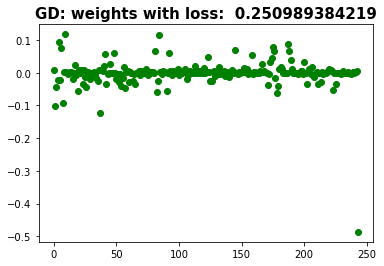

**** Jet  0 *****accuracy jet 82.7429863982
**** Starting Jet  1 *****
Gradient Descent(0/499): loss=0.5000000000000115, w0=0.0003949255898895035, w1=-0.002870062449644063
Gradient Descent(1/499): loss=0.47667491168944576, w0=0.0007525025631038378, w1=-0.00529430216734861
Gradient Descent(2/499): loss=0.4625156526930503, w0=0.0011113512996971308, w1=-0.0073585912706762065
Gradient Descent(3/499): loss=0.45270662777388837, w0=0.0014771618484380774, w1=-0.009134318467178285
Gradient Descent(4/499): loss=0.4453720773883114, w0=0.0018450176280977561, w1=-0.01067885581539123
Gradient Descent(5/499): loss=0.4395917517588707, w0=0.0022081716923546334, w1=-0.012037578947658736
Gradient Descent(6/499): loss=0.43484594437245283, w0=0.0025610690795439947, w1=-0.013246136661279103
Gradient Descent(7/499): loss=0.4308183134987158, w0=0.00290004165194421, w1=-0.014332495593800617
Gradient Descent(8/499): loss=0.4273076078542932, w0=0.003223150156044803, w1=-0.015318631519798316
Gradient Descent(9/49

Gradient Descent(82/499): loss=0.358885413280339, w0=0.017111276412582914, w1=-0.03989778612462224
Gradient Descent(83/499): loss=0.35859147685063086, w0=0.017288160881281777, w1=-0.0400546203811237
Gradient Descent(84/499): loss=0.358303085582159, w0=0.017465011848714962, w1=-0.04020966003013162
Gradient Descent(85/499): loss=0.3580200967607815, w0=0.017641826429446325, w1=-0.04036294926396709
Gradient Descent(86/499): loss=0.35774237242682094, w0=0.017818601751307832, w1=-0.04051453097631221
Gradient Descent(87/499): loss=0.3574697791720318, w0=0.017995334955847226, w1=-0.040664446802387996
Gradient Descent(88/499): loss=0.3572021879470687, w0=0.018172023198821108, w1=-0.04081273715780707
Gradient Descent(89/499): loss=0.3569394738788371, w0=0.018348663650727053, w1=-0.04095944127615411
Gradient Descent(90/499): loss=0.3566815160971518, w0=0.018525253497368586, w1=-0.04110459724534383
Gradient Descent(91/499): loss=0.35642819757015964, w0=0.018701789940447022, w1=-0.04124824204280295

Gradient Descent(164/499): loss=0.3455608400213145, w0=0.03128600984245897, w1=-0.04920697683428617
Gradient Descent(165/499): loss=0.34547451735472223, w0=0.03145255744522256, w1=-0.0492942945997758
Gradient Descent(166/499): loss=0.34538917947847964, w0=0.0316189148821536, w1=-0.04938123129430569
Gradient Descent(167/499): loss=0.34530480896583426, w0=0.0317850813486978, w1=-0.04946779160676424
Gradient Descent(168/499): loss=0.3452213887526181, w0=0.03195105606233724, w1=-0.049553980115480616
Gradient Descent(169/499): loss=0.3451389021287692, w0=0.03211683826230836, w1=-0.04963980129132599
Gradient Descent(170/499): loss=0.3450573327300819, w0=0.03228242720932012, w1=-0.049725259500722256
Gradient Descent(171/499): loss=0.3449766645301803, w0=0.032447822185272424, w1=-0.04981035900856107
Gradient Descent(172/499): loss=0.34489688183270734, w0=0.03261302249297504, w1=-0.04989510398103592
Gradient Descent(173/499): loss=0.3448179692637231, w0=0.03277802745586714, w1=-0.04997949848839

Gradient Descent(247/499): loss=0.34063027676889845, w0=0.04442120364651071, w1=-0.055449385951667755
Gradient Descent(248/499): loss=0.3405888177701782, w0=0.04457077758333167, w1=-0.05551467682973727
Gradient Descent(249/499): loss=0.3405476303885653, w0=0.044720146541008, w1=-0.05557977241837616
Gradient Descent(250/499): loss=0.34050671110378744, w0=0.04486931074366614, w1=-0.055644673705411624
Gradient Descent(251/499): loss=0.34046605645728245, w0=0.04501827042057267, w1=-0.05570938166546945
Gradient Descent(252/499): loss=0.34042566305098676, w0=0.04516702580602294, w1=-0.055773897260261905
Gradient Descent(253/499): loss=0.34038552754614676, w0=0.04531557713923143, w1=-0.05583822143886809
Gradient Descent(254/499): loss=0.34034564666215783, w0=0.04546392466422386, w1=-0.05590235513800703
Gradient Descent(255/499): loss=0.3403060171754255, w0=0.04561206862973109, w1=-0.055966299282303685
Gradient Descent(256/499): loss=0.34026663591825096, w0=0.04576000928908464, w1=-0.056030054

Gradient Descent(329/499): loss=0.33790289669946855, w0=0.05603187003667436, w1=-0.0602249311463674
Gradient Descent(330/499): loss=0.3378758987029362, w0=0.056165681390826935, w1=-0.060276674502431744
Gradient Descent(331/499): loss=0.33784901382280635, w0=0.05629931588712354, w1=-0.06032827625960448
Gradient Descent(332/499): loss=0.33782224110486536, w0=0.05643277392308685, w1=-0.06037973686467743
Gradient Descent(333/499): loss=0.33779557960805817, w0=0.05656605589642381, w1=-0.060431056761436786
Gradient Descent(334/499): loss=0.3377690284042581, w0=0.05669916220499987, w1=-0.06048223639070521
Gradient Descent(335/499): loss=0.33774258657803946, w0=0.056832093246813736, w1=-0.060533276190383144
Gradient Descent(336/499): loss=0.337716253226455, w0=0.056964849419972645, w1=-0.060584176595489224
Gradient Descent(337/499): loss=0.3376900274588182, w0=0.057097431122668074, w1=-0.06063493803819997
Gradient Descent(338/499): loss=0.33766390839648885, w0=0.057229838753152004, w1=-0.06068

Gradient Descent(411/499): loss=0.3359981982326906, w0=0.0664520298753362, w1=-0.06403286281912224
Gradient Descent(412/499): loss=0.33597816386570917, w0=0.06657264164081562, w1=-0.06407426882571571
Gradient Descent(413/499): loss=0.3359581934698057, w0=0.06669310817196519, w1=-0.06411556255262318
Gradient Descent(414/499): loss=0.33593828667943787, w0=0.0668134298289944, w1=-0.06415674429006192
Gradient Descent(415/499): loss=0.33591844313254016, w0=0.06693360697130538, w1=-0.06419781432704312
Gradient Descent(416/499): loss=0.33589866247047406, w0=0.0670536399574896, w1=-0.0642387729513823
Gradient Descent(417/499): loss=0.3358789443379792, w0=0.06717352914532458, w1=-0.06427962044970946
Gradient Descent(418/499): loss=0.33585928838312534, w0=0.06729327489177078, w1=-0.06432035710747908
Gradient Descent(419/499): loss=0.3358396942572646, w0=0.06741287755296858, w1=-0.06436098320898007
Gradient Descent(420/499): loss=0.3358201616149853, w0=0.06753233748423534, w1=-0.06440149903734549

Gradient Descent(493/499): loss=0.33454043033031855, w0=0.07589030194093702, w1=-0.06707910557799185
Gradient Descent(494/499): loss=0.3345246674752867, w0=0.0760001259445846, w1=-0.06711217647242759
Gradient Descent(495/499): loss=0.33450894692121946, w0=0.07610983142983345, w1=-0.06714515559475738
Gradient Descent(496/499): loss=0.33449326847767535, w0=0.07621941868697683, w1=-0.06717804316109591
Gradient Descent(497/499): loss=0.33447763195546815, w0=0.07632888800547392, w1=-0.0672108393868762
Gradient Descent(498/499): loss=0.3344620371666551, w0=0.07643823967395123, w1=-0.06724354448685345
Gradient Descent(499/499): loss=0.3344464839245245, w0=0.0765474739802041, w1=-0.06727615867510871


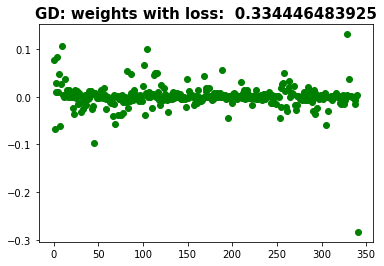

**** Jet  1 *****accuracy jet 76.1670793356
**** Starting Jet  2 *****
Gradient Descent(0/499): loss=0.5000000000000043, w0=0.00029614216829728485, w1=-0.0028070218212909188
Gradient Descent(1/499): loss=0.4197604536606605, w0=0.0006274347081664108, w1=-0.004812881859546138
Gradient Descent(2/499): loss=0.396578588811233, w0=0.0010305208109886257, w1=-0.006335252443573691
Gradient Descent(3/499): loss=0.3869249310657019, w0=0.0014822084712019987, w1=-0.007548178482821083
Gradient Descent(4/499): loss=0.38154677066029263, w0=0.0019551357713601717, w1=-0.008553232447355966
Gradient Descent(5/499): loss=0.37785545804383813, w0=0.0024297122143383297, w1=-0.009412718230184169
Gradient Descent(6/499): loss=0.3749745424229546, w0=0.002894240094219203, w1=-0.010166421664398954
Gradient Descent(7/499): loss=0.3725601169243452, w0=0.003342689481336082, w1=-0.010840634321985242
Gradient Descent(8/499): loss=0.370455684768107, w0=0.0037726222927022637, w1=-0.011453271117201699
Gradient Descent(9/4

Gradient Descent(82/499): loss=0.33370064280020706, w0=0.02316909108512244, w1=-0.026434781624397576
Gradient Descent(83/499): loss=0.3335530164951932, w0=0.023396164589420124, w1=-0.026512003053449463
Gradient Descent(84/499): loss=0.33340759711060125, w0=0.023622803019815414, w1=-0.02658785131605993
Gradient Descent(85/499): loss=0.3332643160164491, w0=0.023849010375831058, w1=-0.026662357122589617
Gradient Descent(86/499): loss=0.3331231075364914, w0=0.024074790546753586, w1=-0.026735550293732244
Gradient Descent(87/499): loss=0.33298390880053, w0=0.024300147315580528, w1=-0.026807459791140617
Gradient Descent(88/499): loss=0.33284665960478355, w0=0.02452508436280562, w1=-0.026878113746782263
Gradient Descent(89/499): loss=0.33271130227985063, w0=0.024749605270051628, w1=-0.026947539491090546
Gradient Descent(90/499): loss=0.3325777815658218, w0=0.024973713523559413, w1=-0.02701576357997283
Gradient Descent(91/499): loss=0.33244604449412873, w0=0.025197412517541075, w1=-0.0270828118

Gradient Descent(164/499): loss=0.3256871326183909, w0=0.04057671414063583, w1=-0.029918303300766606
Gradient Descent(165/499): loss=0.3256188814952921, w0=0.04077585245835431, w1=-0.029938681680761883
Gradient Descent(166/499): loss=0.3255510627120327, w0=0.040974708744595, w1=-0.029958727651404053
Gradient Descent(167/499): loss=0.32548367099923176, w0=0.04117328394100711, w1=-0.02997844541460262
Gradient Descent(168/499): loss=0.32541670119370597, w0=0.04137157898136399, w1=-0.02999783909075368
Gradient Descent(169/499): loss=0.32535014823536934, w0=0.04156959479176021, w1=-0.0300169127207505
Gradient Descent(170/499): loss=0.3252840071642463, w0=0.04176733229080171, w1=-0.030035670267937485
Gradient Descent(171/499): loss=0.3252182731175955, w0=0.04196479238978944, w1=-0.030054115620009342
Gradient Descent(172/499): loss=0.3251529413271373, w0=0.04216197599289653, w1=-0.030072252590857086
Gradient Descent(173/499): loss=0.32508800711638264, w0=0.042358883997339475, w1=-0.0300900849

Gradient Descent(246/499): loss=0.3211880806121766, w0=0.05604272351179403, w1=-0.030755024089959
Gradient Descent(247/499): loss=0.32114376334078315, w0=0.056221384365611075, w1=-0.030757298990351428
Gradient Descent(248/499): loss=0.32109964262835855, w0=0.05639982425692656, w1=-0.030759427434624804
Gradient Descent(249/499): loss=0.3210557169416527, w0=0.05657804379880011, w1=-0.03076141058186283
Gradient Descent(250/499): loss=0.3210119847649122, w0=0.05675604360201943, w1=-0.030763249577020688
Gradient Descent(251/499): loss=0.32096844459959895, w0=0.05693382427511653, w1=-0.030764945551174684
Gradient Descent(252/499): loss=0.3209250949641149, w0=0.057111386424383584, w1=-0.030766499621766474
Gradient Descent(253/499): loss=0.32088193439353296, w0=0.05728873065388853, w1=-0.030767912892841878
Gradient Descent(254/499): loss=0.3208389614393331, w0=0.05746585756549021, w1=-0.030769186455284498
Gradient Descent(255/499): loss=0.320796174669145, w0=0.057642767758853304, w1=-0.0307703

Gradient Descent(328/499): loss=0.3180956312164891, w0=0.07000976756333176, w1=-0.030538428151840404
Gradient Descent(329/499): loss=0.31806352076774835, w0=0.07017216589402735, w1=-0.030531615707995192
Gradient Descent(330/499): loss=0.3180315218170344, w0=0.07033438702114554, w1=-0.030524720205006486
Gradient Descent(331/499): loss=0.3179996336796731, w0=0.0704964314068292, w1=-0.03051774215324349
Gradient Descent(332/499): loss=0.3179678556768289, w0=0.07065829951168939, w1=-0.03051068205892395
Gradient Descent(333/499): loss=0.3179361871354382, w0=0.07081999179481113, w1=-0.03050354042416493
Gradient Descent(334/499): loss=0.3179046273881461, w0=0.07098150871375893, w1=-0.030496317747032747
Gradient Descent(335/499): loss=0.31787317577324126, w0=0.07114285072458242, w1=-0.030489014521592056
Gradient Descent(336/499): loss=0.31784183163459445, w0=0.07130401828182191, w1=-0.03048163123795415
Gradient Descent(337/499): loss=0.3178105943215958, w0=0.07146501183851393, w1=-0.03047416838

Gradient Descent(410/499): loss=0.3157809244173348, w0=0.08277633039617743, w1=-0.02974304795768725
Gradient Descent(411/499): loss=0.31575610633197937, w0=0.0829256063095705, w1=-0.029730822440262046
Gradient Descent(412/499): loss=0.3157313584738227, w0=0.08307473828325232, w1=-0.029718545301653118
Gradient Descent(413/499): loss=0.31570668048068806, w0=0.08322372667034454, w1=-0.029706216827291115
Gradient Descent(414/499): loss=0.3156820719929515, w0=0.08337257182282466, w1=-0.02969383730083187
Gradient Descent(415/499): loss=0.31565753265351837, w0=0.08352127409153007, w1=-0.029681407004171732
Gradient Descent(416/499): loss=0.31563306210780157, w0=0.08366983382616208, w1=-0.029668926217462692
Gradient Descent(417/499): loss=0.31560866000369847, w0=0.08381825137528993, w1=-0.029656395219127333
Gradient Descent(418/499): loss=0.3155843259915682, w0=0.08396652708635478, w1=-0.029643814285873583
Gradient Descent(419/499): loss=0.31556005972421064, w0=0.08411466130567366, w1=-0.029631

Gradient Descent(492/499): loss=0.3139509063315449, w0=0.09456830822203258, w1=-0.02859165621442783
Gradient Descent(493/499): loss=0.31393083583980946, w0=0.09470685916856064, w1=-0.028576010980597057
Gradient Descent(494/499): loss=0.3139108126854149, w0=0.09484529166624338, w1=-0.028560332727133333
Gradient Descent(495/499): loss=0.3138908366569377, w0=0.09498360598665122, w1=-0.028544621632046043
Gradient Descent(496/499): loss=0.3138709075442415, w0=0.09512180240049994, w1=-0.028528877872388662
Gradient Descent(497/499): loss=0.3138510251384657, w0=0.09525988117765376, w1=-0.028513101624265052
Gradient Descent(498/499): loss=0.31383118923201647, w0=0.09539784258712834, w1=-0.028497293062835723
Gradient Descent(499/499): loss=0.3138113996185569, w0=0.09553568689709385, w1=-0.028481452362324015


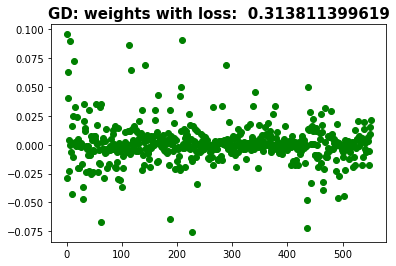

**** Jet  2 *****accuracy jet 78.062287858
**** Starting Jet  3 *****
Gradient Descent(0/499): loss=0.5000000000000024, w0=0.00015222538345797363, w1=-0.0018823800415020493
Gradient Descent(1/499): loss=0.47562766309063986, w0=0.00042173743260116945, w1=-0.003359809643059851
Gradient Descent(2/499): loss=0.4629769235073622, w0=0.0007738823201639273, w1=-0.0045457983181821935
Gradient Descent(3/499): loss=0.45504763138726523, w0=0.001171983621101816, w1=-0.005521207766064697
Gradient Descent(4/499): loss=0.4493616451913824, w0=0.0015886801647374976, w1=-0.006342818424426589
Gradient Descent(5/499): loss=0.44488141119465807, w0=0.0020062158744417356, w1=-0.0070504522144393044
Gradient Descent(6/499): loss=0.441119372137999, w0=0.002414146028709097, w1=-0.007672197515214919
Gradient Descent(7/499): loss=0.43782355889443997, w0=0.00280699367029315, w1=-0.008228057854178576
Gradient Descent(8/499): loss=0.43485242395134505, w0=0.003182447713960593, w1=-0.008732449750081509
Gradient Descent(

Gradient Descent(85/499): loss=0.35525351016972223, w0=0.0195460684555536, w1=-0.023652684425061205
Gradient Descent(86/499): loss=0.3548545813776811, w0=0.019725727104810003, w1=-0.0237597921639165
Gradient Descent(87/499): loss=0.3544627951664534, w0=0.01990503309733249, w1=-0.023865880827613734
Gradient Descent(88/499): loss=0.3540780002932159, w0=0.020083990017874115, w1=-0.02397096783867957
Gradient Descent(89/499): loss=0.35370004921487375, w0=0.020262601339293196, w1=-0.024075070180841845
Gradient Descent(90/499): loss=0.35332879797391564, w0=0.020440870427986976, w1=-0.02417820441320561
Gradient Descent(91/499): loss=0.3529641060890751, w0=0.020618800549043814, w1=-0.02428038668384908
Gradient Descent(92/499): loss=0.3526058364505256, w0=0.020796394871128426, w1=-0.024381632742870318
Gradient Descent(93/499): loss=0.35225385521935987, w0=0.02097365647111386, w1=-0.024481957954913407
Gradient Descent(94/499): loss=0.35190803173111673, w0=0.02115058833847319, w1=-0.02458137731120

Gradient Descent(170/499): loss=0.3369542596309293, w0=0.033787564183885385, w1=-0.03025487044097997
Gradient Descent(171/499): loss=0.336847959882911, w0=0.033944686340097806, w1=-0.03031159866008502
Gradient Descent(172/499): loss=0.33674301399148177, w0=0.034101601435458484, w1=-0.03036798260650776
Gradient Descent(173/499): loss=0.33663939756783373, w0=0.03425831044084307, w1=-0.030424025491562888
Gradient Descent(174/499): loss=0.3365370867025805, w0=0.03441481431932416, w1=-0.03047973047738614
Gradient Descent(175/499): loss=0.3364360579558575, w0=0.03457111402626763, w1=-0.030535100677949317
Gradient Descent(176/499): loss=0.33633628834764184, w0=0.03472721050942641, w1=-0.03059013916005017
Gradient Descent(177/499): loss=0.3362377553482816, w0=0.03488310470903182, w1=-0.030644848944277867
Gradient Descent(178/499): loss=0.3361404368692349, w0=0.03503879755788254, w1=-0.030699233005954712
Gradient Descent(179/499): loss=0.33604431125400824, w0=0.035194289981431495, w1=-0.0307532

Gradient Descent(255/499): loss=0.3310637701403175, w0=0.04648627483631892, w1=-0.03409029887814893
Gradient Descent(256/499): loss=0.3310181647304895, w0=0.046628636574388954, w1=-0.034125830013422176
Gradient Descent(257/499): loss=0.330972888168134, w0=0.04677085255976015, w1=-0.0341611799302189
Gradient Descent(258/499): loss=0.33092793562838085, w0=0.04691292331910741, w1=-0.03419634974124126
Gradient Descent(259/499): loss=0.33088330237339336, w0=0.04705484937570455, w1=-0.03423134054814354
Gradient Descent(260/499): loss=0.3308389837506905, w0=0.047196631249454675, w1=-0.034266153441692426
Gradient Descent(261/499): loss=0.330794975191502, w0=0.0473382694569203, w1=-0.03430078950192416
Gradient Descent(262/499): loss=0.3307512722091565, w0=0.04747976451135313, w1=-0.03433524979829891
Gradient Descent(263/499): loss=0.3307078703975011, w0=0.04762111692272352, w1=-0.034369535389852275
Gradient Descent(264/499): loss=0.3306647654293534, w0=0.0477623271977497, w1=-0.0344036473253439

Gradient Descent(340/499): loss=0.3280177419135494, w0=0.058112694787619004, w1=-0.036555241239887966
Gradient Descent(341/499): loss=0.32798891754549075, w0=0.05824426449377777, w1=-0.036578499045698806
Gradient Descent(342/499): loss=0.3279602071322645, w0=0.05837572353944818, w1=-0.03660164217486286
Gradient Descent(343/499): loss=0.32793160953563594, w0=0.05850707224560445, w1=-0.03662467117258622
Gradient Descent(344/499): loss=0.32790312363485236, w0=0.058638310931553334, w1=-0.036647586580221124
Gradient Descent(345/499): loss=0.3278747483263288, w0=0.05876943991494688, w1=-0.03667038893530585
Gradient Descent(346/499): loss=0.32784648252333926, w0=0.058900459511795046, w1=-0.036693078771604166
Gradient Descent(347/499): loss=0.3278183251557135, w0=0.059031370036478216, w1=-0.03671565661914417
Gradient Descent(348/499): loss=0.32779027516954007, w0=0.05916217180175957, w1=-0.03673812300425659
Gradient Descent(349/499): loss=0.32776233152687506, w0=0.059292865118797354, w1=-0.036

Gradient Descent(424/499): loss=0.32591129688653464, w0=0.06880650245134057, w1=-0.038154689848264735
Gradient Descent(425/499): loss=0.32588928178369914, w0=0.06892975795250507, w1=-0.038169911187978356
Gradient Descent(426/499): loss=0.32586732470833385, w0=0.06905292495315464, w1=-0.03818505317473394
Gradient Descent(427/499): loss=0.32584542529557015, w0=0.06917600366899528, w1=-0.03820011612993354
Gradient Descent(428/499): loss=0.32582358318468946, w0=0.06929899431480788, w1=-0.03821510037317573
Gradient Descent(429/499): loss=0.3258017980190573, w0=0.06942189710445416, w1=-0.03823000622226967
Gradient Descent(430/499): loss=0.3257800694460603, w0=0.06954471225088248, w1=-0.0382448339932491
Gradient Descent(431/499): loss=0.325758397117043, w0=0.06966743996613363, w1=-0.03825958400038607
Gradient Descent(432/499): loss=0.32573678068724604, w0=0.06979008046134662, w1=-0.03827425655620464
Gradient Descent(433/499): loss=0.3257152198157458, w0=0.06991263394676432, w1=-0.038288851971

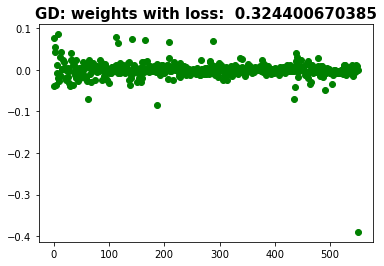

**** Jet  3 *****accuracy jet 76.1234434218
>>>>>>>> Accuracy TOTAL  79.1732


In [22]:
deg=5;
mask_jets_train = split_jets_mask(tx_train)
mask_jets_test = split_jets_mask(tx_test)
len_mask = len(mask_jets_train)

y_preds_train = np.zeros(len(y_train))
y_preds_test = np.zeros(tx_test.shape[0])



for mask_jet_id in range(len_mask):
    print('**** Starting Jet ', mask_jet_id, '*****')
    tx_single_jet_train = tx_train[mask_jets_train[mask_jet_id]]
    tx_single_jet_test =  tx_test[mask_jets_test[mask_jet_id]]
    y_single_jet_train =   y_train[mask_jets_train[mask_jet_id]]
    tx_single_jet_train, tx_single_jet_test, len_init = prepare_data(tx_single_jet_train, tx_single_jet_test, deg);
    initial_w = np.zeros(tx_single_jet_train.shape[1]);
    w, loss = func_GD (y=y_single_jet_train, tx=tx_single_jet_train, test_set=tx_single_jet_test, max_iters=500,gamma=0.01, initial_w=initial_w);
    
    y_pred_train = predict_labels(w, tx_single_jet_train)
    y_pred_test = predict_labels(w, tx_single_jet_test)
    y_preds_train[mask_jets_train[mask_jet_id]] = y_pred_train
    y_preds_test[mask_jets_test[mask_jet_id]] = y_pred_test
    
    right_train = np.sum(y_single_jet_train == y_pred_train)/len(y_single_jet_train )*100
    
    print('**** Jet ', mask_jet_id, '*****accuracy jet',right_train)
    

    
right_train_total = np.sum(y_train == y_preds_train)/len(y_train )*100
print('>>>>>>>> Accuracy TOTAL ',right_train_total)

In [23]:
y_pred = predict_labels(w, tx_test)
len(y_pred[y_pred==-1])


ValueError: shapes (568238,30) and (552,) not aligned: 30 (dim 1) != 552 (dim 0)

## Ridge regression   

In [ ]:
deg=5;
lambda_=1e-5
mask_jets_train = split_jets_mask(tx_train)
mask_jets_test = split_jets_mask(tx_test)
len_mask = len(mask_jets_train)
for mask_jet_id in range(len_mask):
    print('**** Starting Jet ', mask_jet_id, '*****')
    tx_single_jet_train = tx_train[mask_jets_train[mask_jet_id]]
    tx_single_jet_test =  tx_test[mask_jets_test[mask_jet_id]]
    y_single_jet_train =   y_train[mask_jets_train[mask_jet_id]]
    tx_single_jet_train, tx_single_jet_test, len_init = prepare_data(tx_single_jet_train, tx_single_jet_test, deg);
    
    [w,loss]=func_ridge_regression (y=y_single_jet_train, tx=tx_single_jet_train, test_set=tx_single_jet_test, lambda_=lambda_);    
    
    y_pred_train = predict_labels(w, tx_single_jet_train)
    y_pred_test = predict_labels(w, tx_single_jet_test)
    y_preds_train[mask_jets_train[mask_jet_id]] = y_pred_train
    y_preds_test[mask_jets_test[mask_jet_id]] = y_pred_test
    
    right_train = np.sum(y_single_jet_train == y_pred_train)/len(y_single_jet_train )*100
    
    print('**** Jet ', mask_jet_id, '*****accuracy jet',right_train)
    

    
right_train_total = np.sum(y_train == y_preds_train)/len(y_train )*100
print('>>>>>>>> Accuracy TOTAL ',right_train_total)

##  SGD

In [ ]:
def func_SGD (y, tx, test_set, max_iters, gamma, initial_w, batch_size):
    name = 'Stochastic_Gradient_descent'
    
    w,loss = least_squares_SGD(y, tx, initial_w, max_iters,\
                               gamma, batch_size)
    
    y_pred = predict_labels(w, test_set)
    create_csv_submission(ids_test, y_pred, OUT_FOLDER+name)
    
    plt.plot(w, 'go')
    plt.title('SGD: weights with loss:  '+str(loss),fontsize=15, fontweight='bold');
    plt.show()
    
    return w, loss

In [ ]:
deg=5;
lambda_=1e-5
mask_jets_train = split_jets_mask(tx_train)
mask_jets_test = split_jets_mask(tx_test)
len_mask = len(mask_jets_train)
for mask_jet_id in range(len_mask):
    print('**** Starting Jet ', mask_jet_id, '*****')
    tx_single_jet_train = tx_train[mask_jets_train[mask_jet_id]]
    tx_single_jet_test =  tx_test[mask_jets_test[mask_jet_id]]
    y_single_jet_train =   y_train[mask_jets_train[mask_jet_id]]
    tx_single_jet_train, tx_single_jet_test, len_init = prepare_data(tx_single_jet_train, tx_single_jet_test, deg);
    
    initial_w = np.zeros(tx_single_jet_train.shape[1]);
    w, loss = func_SGD (y=y_single_jet_train, tx=tx_single_jet_train, test_set=tx_single_jet_test, max_iters=500,gamma=0.00005, initial_w=initial_w,\
                   batch_size=1);    
   
    y_pred_train = predict_labels(w, tx_single_jet_train)
    y_pred_test = predict_labels(w, tx_single_jet_test)
    y_preds_train[mask_jets_train[mask_jet_id]] = y_pred_train
    y_preds_test[mask_jets_test[mask_jet_id]] = y_pred_test
    
    right_train = np.sum(y_single_jet_train == y_pred_train)/len(y_single_jet_train )*100
    
    print('**** Jet ', mask_jet_id, '*****accuracy jet',right_train)
    

    
right_train_total = np.sum(y_train == y_preds_train)/len(y_train )*100
print('>>>>>>>> Accuracy TOTAL ',right_train_total)






## LOGISTIC REGRESSION

In [ ]:
def build_k_indices(y, k_fold, seed):
    """build k indices for k-fold."""
    num_row = y.shape[0]
    interval = int(num_row / k_fold)
    np.random.seed(seed)
    indices = np.random.permutation(num_row)
    k_indices = [indices[k * interval: (k + 1) * interval]
                 for k in range(k_fold)]
    return np.array(k_indices)

def cross_validation_logistic_regression(y,tx, k_fold, max_iters, gammas):
    
    accuracies_test=np.zeros(len(gammas))
    accuracies_train=np.zeros(len(gammas))
    acc_max=0;
    gamma_best=0;
    
    for i, single_gamma in enumerate(gammas):
        
        seed=1;

        # get k'th subgroup in test, others in train
        k_indices = build_k_indices(y, k_fold, seed)
        accuracy_train = np.zeros(k_fold)
        accuracy_test = np.zeros(k_fold)


        for k in range(k_fold):
            #print('----- FOLD', k, '-----')
            k_index = k_indices[k]
            test_y = y[k_index]
            test_tx = tx[k_index,:]
            mask = np.ones(len(y), dtype=bool) # set all elements to True
            mask[k_index] = False              # set test elements to False
            train_tx = tx[mask,:]              # select only True elements (ie train elements)
            train_y = y[mask]
            initial_w = np.zeros(train_tx.shape[1]);
            weights,loss = logistic_regression(train_y, train_tx, initial_w, max_iters, single_gamma)
            # Compute the predictions
            y_pred_train = predict_labels(weights, train_tx)
            y_pred_test = predict_labels(weights, test_tx);
            accuracy_train[k] = np.sum(y_pred_train == train_y)/len(train_y)
            accuracy_test[k] = np.sum(y_pred_test == test_y)/len(test_y)
            
        accuracies_test[i]=np.mean(accuracy_test);
        accuracies_train[i]=np.mean(accuracy_train);
        
        print('GAMMA:', single_gamma, '---','ACCURANCY TEST:',accuracies_test[i], '---','ACCURANCY TRAIN:',accuracies_train[i])
        if (accuracies_test[i]>acc_max):
                gamma_best=gammas[i];
                acc_max=accuracies_test[i];
    
    return [gamma_best,acc_max]
               
        # Compute accuracy of the predictions

        

In [ ]:
def func_logistic (y, tx, test_set, max_iters, gamma, initial_w):
    name = 'Logistic regression'
    
    #w,loss = logistic_regression(y, tx, initial_w, max_iters, gamma)
    w,loss = logistic_regression(y, tx, initial_w, max_iters, gamma)
    
    loss=loss/len(y);
    y_pred = predict_labels(w, test_set)
    create_csv_submission(ids_test, y_pred, OUT_FOLDER+name)  
    
    plt.plot(w, 'go')
    plt.title('logistic reg: weights with loss:  '+str(loss),fontsize=15, fontweight='bold');
    plt.show()
    
    return w, loss

In [ ]:
gammas=np.linspace(0.00001,0.9,10);
k_fold=3;
max_iters=1000;
deg=5;


mask_jets_train = split_jets_mask(tx_train)
mask_jets_test = split_jets_mask(tx_test)
len_mask = len(mask_jets_train)
for mask_jet_id in range(len_mask):
    print('**** Starting Jet ', mask_jet_id, '*****')
    tx_single_jet_train = tx_train[mask_jets_train[mask_jet_id]]
    tx_single_jet_test =  tx_test[mask_jets_test[mask_jet_id]]
    y_single_jet_train =   y_train[mask_jets_train[mask_jet_id]]
    tx_single_jet_train, tx_single_jet_test, len_init = prepare_data(tx_single_jet_train, tx_single_jet_test, deg);
    
    
    
    [best_gamma,acc_max]=cross_validation_logistic_regression(y_single_jet_train, tx_single_jet_train, k_fold, max_iters, gammas)
    
    print('BEST GAMMA:', best_gamma, '---','ACCURANCY:',acc_max)

    initial_w = np.zeros(tx_single_jet_train.shape[1]);
    w, loss = func_logistic (y=y_single_jet_train, tx=tx_single_jet_train, test_set=tx_single_jet_test, max_iters=1000,\
                         gamma=best_gamma, initial_w=initial_w);
    
    y_pred_train = predict_labels(w, tx_single_jet_train)
    y_pred_test = predict_labels(w, tx_single_jet_test)
    y_preds_train[mask_jets_train[mask_jet_id]] = y_pred_train
    y_preds_test[mask_jets_test[mask_jet_id]] = y_pred_test
    
    right_train = np.sum(y_single_jet_train == y_pred_train)/len(y_single_jet_train )*100
    
    print('**** Jet ', mask_jet_id, '*****accuracy jet',right_train)
    

    
right_train_total = np.sum(y_train == y_preds_train)/len(y_train )*100
print('>>>>>>>> Accuracy TOTAL ',right_train_total)


    
    
    


## LOGISTIC REGULARIZED

In [ ]:
def build_k_indices(y, k_fold, seed):
    """build k indices for k-fold."""
    num_row = y.shape[0]
    interval = int(num_row / k_fold)
    np.random.seed(seed)
    indices = np.random.permutation(num_row)
    k_indices = [indices[k * interval: (k + 1) * interval]
                 for k in range(k_fold)]
    return np.array(k_indices)

def cross_validation_logistic_regression_reg(y,tx, k_fold, max_iters, gammas,lambdas):
    
    acc_max=0;
    accuracies_test=np.zeros([len(gammas),len(lambdas)]);
    
    accuracies_train=np.zeros([len(gammas),len(lambdas)]);
    
    
    for i, single_gamma in enumerate(gammas):
        for j, single_lambda in enumerate(lambdas):
            seed=1;
        
            # get k'th subgroup in test, others in train
            k_indices = build_k_indices(y, k_fold, seed)
            accuracy_train = np.zeros(k_fold)
            accuracy_test = np.zeros(k_fold)


            for k in range(k_fold):
                #print('----- FOLD', k, '-----')
                k_index = k_indices[k]
                test_y = y[k_index]
                test_tx = tx[k_index,:]

                mask = np.ones(len(y), dtype=bool) # set all elements to True
                mask[k_index] = False              # set test elements to False
                train_tx = tx[mask,:]              # select only True elements (ie train elements)
                train_y = y[mask]
                initial_w = np.zeros(train_tx.shape[1]);
                weights,loss = reg_logistic_regression(train_y, train_tx,single_lambda, initial_w, max_iters, single_gamma)
                # Compute the predictions
                y_pred_train = predict_labels(weights, train_tx)
                y_pred_test = predict_labels(weights, test_tx)
                predictions=True;
                accuracy_train[k] = np.sum(y_pred_train == train_y)/len(train_y)
                accuracy_test[k] = np.sum(y_pred_test == test_y)/len(test_y)
                
                
            accuracies_test[i,j]= np.mean(accuracy_test);
            accuracies_train[i,j]= np.mean(accuracy_train);
            print('GAMMA', single_gamma, '---','LAMBDA', single_lambda, '---ACCURANCY TEST:',accuracies_test[i,j],'---ACCURANCY TRAIN:',accuracies_train[i,j])
            
            if (accuracies_test[i,j]>acc_max):
                gamma_best=gammas[i];
                lambda_best=lambdas[j];
                acc_max=accuracies_test[i,j];
            
            
    return [gamma_best,lambda_best,acc_max]
     
    
    
            # Compute accuracy of the predictions

            

In [ ]:
def func_logistic_reg (y, tx, lambda_, test_set, max_iters, gamma, initial_w):
    name = 'Logistic regression regularized'
    
    #w,loss = logistic_regression(y, tx, initial_w, max_iters, gamma)
    w,loss = reg_logistic_regression(y, tx, lambda_, initial_w, max_iters, gamma)
    
    loss=loss/len(y);
    y_pred = predict_labels(w, test_set)
    create_csv_submission(ids_test, y_pred, OUT_FOLDER+name)
    
    plt.plot(w, 'go')
    plt.title('logistic reg: weights with the normalized log-like:  '+str(loss),fontsize=15, fontweight='bold');
    plt.show()
    
    return w, loss

In [ ]:
#test cross_validation

gammas=np.linspace(0.000001,0.0001,2);
lambdas=np.linspace(0.001,0.3,2);
k_fold=6;
max_iters=50;

deg=2;

mask_jets_train = split_jets_mask(tx_train)
mask_jets_test = split_jets_mask(tx_test)
len_mask = len(mask_jets_train)
for mask_jet_id in range(len_mask):
    print('**** Starting Jet ', mask_jet_id, '*****')
    tx_single_jet_train = tx_train[mask_jets_train[mask_jet_id]]
    tx_single_jet_test =  tx_test[mask_jets_test[mask_jet_id]]
    y_single_jet_train =   y_train[mask_jets_train[mask_jet_id]]
    tx_single_jet_train, tx_single_jet_test, len_init
    = prepare_data(tx_single_jet_train, tx_single_jet_test, deg);
    
    [gamma_best,lambda_best,acc_max]= cross_validation_logistic_regression_reg(y_single_jet_train, tx_single_jet_train, k_fold, max_iters, gammas,lambdas)
    print('BEST GAMMA', gamma_best, '---','BEST LAMBDA', lambda_best, '---ACCURANCY:',acc_max)
    
    initial_w = np.zeros(tx_single_jet_train.shape[1]);
    w, loss = func_logistic_reg (y=y_single_jet_train, tx=tx_single_jet_train, lambda_=lambda_best, test_set=tx_single_jet_test , max_iters=max_iters,\
                         gamma=gamma_best, initial_w=initial_w);


    
    y_pred_train = predict_labels(w, tx_single_jet_train)
    y_pred_test = predict_labels(w, tx_single_jet_test)
    y_preds_train[mask_jets_train[mask_jet_id]] = y_pred_train
    y_preds_test[mask_jets_test[mask_jet_id]] = y_pred_test
    
    right_train = np.sum(y_single_jet_train == y_pred_train)/len(y_single_jet_train )*100
    
    print('**** Jet ', mask_jet_id, '*****accuracy jet',right_train)
    

    
right_train_total = np.sum(y_train == y_preds_train)/len(y_train )*100
print('>>>>>>>> Accuracy TOTAL ',right_train_total)


    
    
